In [ ]:
Jailson p

In [1]:
import numpy as np
import random

In [3]:
# dados de treinamento com a bias
X = [[-1,0,0],[-1,0,1],[-1,1,0],[-1,1,1]]
#X = [[-1,2,2],[-1,4,4]] #teste de aula
for i in range(len(X)):
    X[i] = np.asarray(X[i])
    
Y = [1,1,1,0]
#Y = [1,0]

In [4]:
X

[array([-1,  0,  0]),
 array([-1,  0,  1]),
 array([-1,  1,  0]),
 array([-1,  1,  1])]

# Neurônio Perceptron - Treinamento

In [5]:
#cálculo para a soma ponderada das entradas com seus respectivos pesos
def calculo_pesos(x,w):
    u = 0
    for i in range(len(w)):
        u = u + x[i] * w[i]
    #print(u)    
    return u

In [6]:
#pesos = [-0.5441,0.5562,-0.4024]
#x = [-1,2,2]
#result = calculo_pesos(X[0],pesos)
#print(result)
#função ativação o

In [7]:
#função de ativação 
def funcao_ativacao(x,w):
    if(calculo_pesos(x,w) >= 0):
        return 1
    else:
        return 0

In [9]:
#cálculo do ajuste de pesos sinápticos
def ajuste_pesos(e,wi,xi):
    n = 0.1
    aux = n * e * xi
    w_ajus = wi + aux
    return w_ajus
    

In [10]:
def train_perceptron(X,Y):
    #w = [-0.5441,0.5562,-0.4024] #falta os pesos aleatórios
    w = np.random.uniform(-0.5,0.5,3)
    conv_max = False
    cont = 0
    qnt_ajuste_peso = 0
    while(conv_max == False):
        cont = cont + 1
        lista_pred = []
        conv = 0
        print("Epoch:",cont,"#################################")
        print("Vetor de pesos na época ",cont, ":",w)
        for i in range(len(X)): 
            yi = funcao_ativacao(X[i],w)
            e = Y[i] - yi
            if(e != 0):
                w = ajuste_pesos(e,w,X[i])
                qnt_ajuste_peso = qnt_ajuste_peso + 1
            else:
                lista_pred.append(yi)
                conv = conv + 1 
              
        print("quantidade de exemplos corretos: ",conv)
        print("quantidade de exemplos errados: ",len(X) - conv)
        print()
        if(conv == len(X)):
            conv_max = True
            
    print("pesos final: ",w)
    print("quantidade de vezes que o peso foi ajustado: ",qnt_ajuste_peso)
    return lista_pred,w

In [11]:
(pred,W) = train_perceptron(X,Y)

Epoch: 1 #################################
Vetor de pesos na época  1 : [ 0.06314902 -0.14485108 -0.0192915 ]
quantidade de exemplos corretos:  1
quantidade de exemplos errados:  3

Epoch: 2 #################################
Vetor de pesos na época  2 : [-0.03685098 -0.14485108 -0.1192915 ]
quantidade de exemplos corretos:  1
quantidade de exemplos errados:  3

Epoch: 3 #################################
Vetor de pesos na época  3 : [-0.13685098 -0.14485108 -0.1192915 ]
quantidade de exemplos corretos:  2
quantidade de exemplos errados:  2

Epoch: 4 #################################
Vetor de pesos na época  4 : [-0.13685098 -0.14485108 -0.2192915 ]
quantidade de exemplos corretos:  3
quantidade de exemplos errados:  1

Epoch: 5 #################################
Vetor de pesos na época  5 : [-0.23685098 -0.14485108 -0.1192915 ]
quantidade de exemplos corretos:  4
quantidade de exemplos errados:  0

pesos final:  [-0.23685098 -0.14485108 -0.1192915 ]
quantidade de vezes que o peso foi aju

In [12]:
print(pred)

[1, 1, 1, 0]


In [13]:
print(W) #vetor de pesos após a convergência

[-0.23685098 -0.14485108 -0.1192915 ]


# Vissualização da Fronteira de Decisão

In [14]:
import matplotlib.pyplot as plt

In [15]:
X[1],X[2]

(array([-1,  0,  1]), array([-1,  1,  0]))

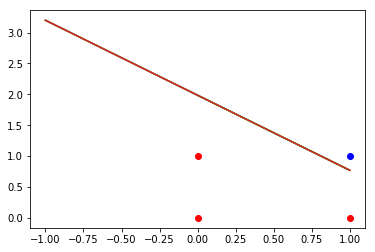

In [16]:
cont = 0
for i in X:
    plt.plot(i[1],i[2],'ro' if (Y[cont] == 1.0) else 'bo')
    cont = cont + 1
for i in range(len(X)):#np.linspace(np.amin(X),np.amax(X)):
    x = X[i]
    yi = (W[0]/W[2]) - (W[1]/W[2]) * x
    plt.plot(x,yi)

# Funções de Ativação

In [17]:
Xd = [1,2,3,4]#np.random.uniform(-1.5,1.5,4)
Yd = np.random.uniform(-1.5,1.5,4)

In [18]:
Yd

array([-0.60707517,  1.26359347, -0.15737886, -0.9690683 ])

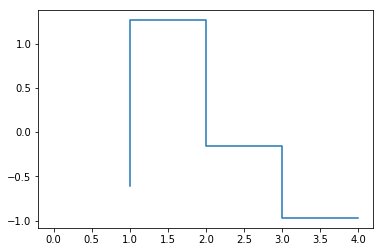

In [19]:
plt.step(Xd,Yd,0.5)
plt.show()

In [20]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

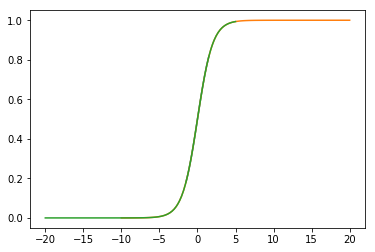

In [35]:
xs = np.linspace(-1.5,1.5,100)
ys = sigmoid(xs)
plt.plot(xs,ys)

xs1 = np.linspace(-10,20,100)
ys1 = sigmoid(xs1)
plt.plot(xs1,ys1)

xs2 = np.linspace(5,-20,100)
ys2 = sigmoid(xs2)
plt.plot(xs2,ys2)

plt.show()

In [37]:
a = np.linspace(-1.5,1.5,6)

In [38]:
y = np.sinh(a)

In [39]:
y

array([-2.12927946, -1.02651673, -0.30452029,  0.30452029,  1.02651673,
        2.12927946])

In [40]:
x_th = np.linspace(-1.5,1.5,6) #[1,2,3,4,5,6]

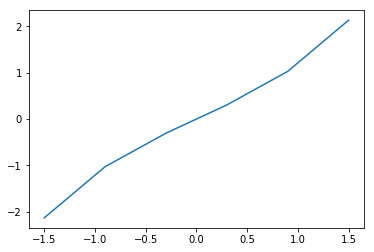

In [41]:
plt.plot(x_th,y)
plt.show()

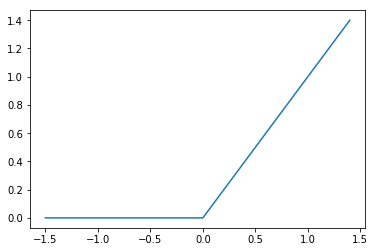

In [42]:
x_relu = np.arange(-1.5,1.5,.1)
zero = np.zeros(len(x_relu))
y_relu = np.max([zero,x_relu],axis=0)

plt.plot(x_relu,y_relu)
plt.show()